In [1]:
# Import Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import datascience
import imblearn



In [2]:
batch_data = pd.read_csv("../../data/datasets/batch_meta_combine.csv")

X_train_scaled = pd.read_csv("../../data/datasets/X_train_scaled.csv",header=None)
X_train_scaled_oversample = pd.read_csv("../../data/datasets/X_train_scaled_oversample.csv",header=None)
X_val_scaled = pd.read_csv("../../data/datasets/X_val_scaled.csv",header=None)
X_test_scaled = pd.read_csv("../../data/datasets/X_test_scaled.csv",header=None)

X_test_herds = pd.read_csv("../../data/datasets/X_test_herds.csv")

    


y_train = pd.read_csv("../../data/datasets/y_train.csv")
y_train = list(y_train['group_class'])

y_train_oversample = pd.read_csv("../../data/datasets/y_train_oversample.csv")
y_train_oversample = list(y_train_oversample['group_class'])


y_val = pd.read_csv("../../data/datasets/y_val.csv")
y_val = list(y_val['group_class'])

y_test = pd.read_csv("../../data/datasets/y_test.csv")
y_test = list(y_test['group_class'])


num_features = 25

# Subset X Data to top features
X_train_scaled = X_train_scaled.iloc[:, : num_features]
X_train_scaled_oversample = X_train_scaled_oversample.iloc[:, : num_features]
X_val_scaled = X_val_scaled.iloc[:, : num_features]
X_test_scaled = X_test_scaled.iloc[:, : num_features]


In [3]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_scaled, y_train)


y_test_predict = clf.predict(X_test_scaled)

clf.score(X_test_scaled,y_test)

#class_dict = classification_report(y_test,y_test_predict, output_dict=True)



0.7777777777777778

In [4]:
 plot_confusion_matrix(clf, X_test_scaled, y_test,
                                 display_labels=['chronic','non_chronic'],
                                 cmap=plt.cm.Blues)

## Optimize Parameters

In [5]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#A function which returns the corresponding SVC model
def getClassifier(ktype,gamma_val,c_val):
    if ktype == 0:
        # Polynomial kernal
        return svm.SVC(kernel='poly', degree=8, gamma=gamma_val,C=c_val)
    elif ktype == 1:
        # Radial Basis Function kernal
        return svm.SVC(kernel='rbf', gamma=gamma_val,C=c_val)
    elif ktype == 2:
        # Sigmoid kernal
        return svm.SVC(kernel='sigmoid', gamma=gamma_val,C=c_val)
    elif ktype == 3:
        # Linear kernal
        return svm.SVC(kernel='linear', gamma=gamma_val,C=c_val)

In [6]:
# Try multiple different Kernels, c, and gamma
svm_scores = dict()


for i in range(4):
    for c_val in [0.1,1, 10, 100]:
        for gamma_val in [1,0.1,0.01,0.001]:
            run_name = kernels[i]+" "+str(c_val) + " " + str(gamma_val)
            clf = getClassifier(i,gamma_val,c_val) 
            clf.fit(X_train_scaled, y_train)# Make prediction
            y_pred = clf.predict(X_val_scaled)# Evaluate our model

            class_dict = classification_report(y_val,y_pred, output_dict=True,zero_division=1)
            svm_scores[run_name] = class_dict
    

chron_recall_list = list()
chron_prec_list = list()

for key in svm_scores:
    chron_recall_list.append((svm_scores[key]['chronic']['recall'],key))
    chron_prec_list.append((svm_scores[key]['chronic']['precision'],key))

chron_recall_list.sort(reverse=True)
chron_prec_list.sort(reverse=True)


In [8]:
chron_recall_list[:25]

[(0.8461538461538461, 'Linear 100 1'),
 (0.8461538461538461, 'Linear 100 0.1'),
 (0.8461538461538461, 'Linear 100 0.01'),
 (0.8461538461538461, 'Linear 100 0.001'),
 (0.7692307692307693, 'Linear 10 1'),
 (0.7692307692307693, 'Linear 10 0.1'),
 (0.7692307692307693, 'Linear 10 0.01'),
 (0.7692307692307693, 'Linear 10 0.001'),
 (0.7692307692307693, 'Linear 1 1'),
 (0.7692307692307693, 'Linear 1 0.1'),
 (0.7692307692307693, 'Linear 1 0.01'),
 (0.7692307692307693, 'Linear 1 0.001'),
 (0.6923076923076923, 'RBF 100 0.01'),
 (0.6923076923076923, 'RBF 100 0.001'),
 (0.6153846153846154, 'RBF 10 0.01'),
 (0.5384615384615384, 'Sigmoid 100 0.1'),
 (0.5384615384615384, 'Sigmoid 100 0.001'),
 (0.5384615384615384, 'Sigmoid 10 0.01'),
 (0.5384615384615384, 'Linear 0.1 1'),
 (0.5384615384615384, 'Linear 0.1 0.1'),
 (0.5384615384615384, 'Linear 0.1 0.01'),
 (0.5384615384615384, 'Linear 0.1 0.001'),
 (0.46153846153846156, 'Sigmoid 10 0.1'),
 (0.46153846153846156, 'Sigmoid 1 0.1'),
 (0.46153846153846156, '

In [10]:
chron_prec_list


[(1.0, 'Sigmoid 10 0.001'),
 (1.0, 'Sigmoid 1 0.01'),
 (1.0, 'Sigmoid 1 0.001'),
 (1.0, 'Sigmoid 0.1 1'),
 (1.0, 'Sigmoid 0.1 0.1'),
 (1.0, 'Sigmoid 0.1 0.01'),
 (1.0, 'Sigmoid 0.1 0.001'),
 (1.0, 'RBF 1 1'),
 (1.0, 'RBF 1 0.01'),
 (1.0, 'RBF 1 0.001'),
 (1.0, 'RBF 0.1 1'),
 (1.0, 'RBF 0.1 0.1'),
 (1.0, 'RBF 0.1 0.01'),
 (1.0, 'RBF 0.1 0.001'),
 (1.0, 'Polynomial 100 0.01'),
 (1.0, 'Polynomial 100 0.001'),
 (1.0, 'Polynomial 10 0.01'),
 (1.0, 'Polynomial 10 0.001'),
 (1.0, 'Polynomial 1 0.01'),
 (1.0, 'Polynomial 1 0.001'),
 (1.0, 'Polynomial 0.1 0.01'),
 (1.0, 'Polynomial 0.1 0.001'),
 (0.8571428571428571, 'RBF 10 0.1'),
 (0.8571428571428571, 'RBF 1 0.1'),
 (0.8333333333333334, 'Sigmoid 100 0.01'),
 (0.8333333333333334, 'RBF 10 0.001'),
 (0.8333333333333334, 'Linear 1 1'),
 (0.8333333333333334, 'Linear 1 0.1'),
 (0.8333333333333334, 'Linear 1 0.01'),
 (0.8333333333333334, 'Linear 1 0.001'),
 (0.8181818181818182, 'RBF 100 0.001'),
 (0.7777777777777778, 'Sigmoid 100 0.001'),
 (0.7777777

In [9]:
clf = getClassifier(3,c_val = 1,gamma_val = 1)
#clf = getClassifier(0,c_val = 1,gamma_val = .1)

clf.fit(X_train_scaled, y_train)


y_val_predict = clf.predict(X_val_scaled)
y_test_predict = clf.predict(X_test_scaled)


#clf.score(X_val_scaled,y_val)

# print(classification_report(y_val,y_val_predict, output_dict=True))
print(classification_report(y_test,y_test_predict, output_dict=True))

#plot_confusion_matrix(clf, X_val_scaled, y_val,
 #                                display_labels=['chronic','non_chronic'],
  #                               cmap=plt.cm.Blues)
# plot_confusion_matrix(clf, X_test_scaled, y_test,
#                                  display_labels=['chronic','non_chronic'],
#                                  cmap=plt.cm.Blues)


# Try Optimimal Parameters on Test Data




{'chronic': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 8}, 'not_chronic': {'precision': 0.8571428571428571, 'recall': 0.8571428571428571, 'f1-score': 0.8571428571428571, 'support': 28}, 'accuracy': 0.7777777777777778, 'macro avg': {'precision': 0.6785714285714286, 'recall': 0.6785714285714286, 'f1-score': 0.6785714285714286, 'support': 36}, 'weighted avg': {'precision': 0.7777777777777778, 'recall': 0.7777777777777778, 'f1-score': 0.7777777777777778, 'support': 36}}


### Leave One Herd Out Predictions

In [18]:
batch_data2 = pd.read_csv("../../data/datasets/batch_meta_combine.csv")
rf_features = pd.read_csv("../../data/datasets/rf_features.csv")


herds = batch_data2.herd.unique()

# Loop to Train SVM, leaving one herd out each time

herd_scores = dict()

for herd in herds:
      # Split into Training and Test Datasets
    feat_to_keep = rf_features['feature'].head(25)
    
    
    
    train = batch_data2[batch_data2['herd']!=herd]
    test = batch_data2[batch_data2['herd']==herd]
    
    
#     if (len(train.group_class.unique())==3):
#         pass
#     else:
    X_train = train.filter(regex=("x.*"))
    X_train = X_train[feat_to_keep]

    X_test = test.filter(regex=("x.*"))
    X_test = X_test[feat_to_keep]

    y_train = train['group_class']
    y_test = test['group_class']



    # Standardize X data
    scaler = preprocessing.StandardScaler().fit(X_train)

    scaler.mean_


    scaler.scale_


    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = getClassifier(3,c_val = 1,gamma_val = 1)
    clf.fit(X_train_scaled, y_train)


    y_test_predict = clf.predict(X_test_scaled)

    class_report = classification_report(y_test,y_test_predict, output_dict=True,zero_division=1)

    herd_scores[herd] = class_report
        

    

In [19]:
# Pull Chronic Precision and Accuracy into list
herd_list = []
herd_num_chronic = []
herd_num_non_chronic = []
herd_precision = []
herd_recall = []
herd_accuracy = []

for key in herd_scores:
    herd_list.append(key)
    herd_num_non_chronic.append(herd_scores[key]['not_chronic']['support'])
    if 'chronic' in herd_scores[key]:
        herd_num_chronic.append(herd_scores[key]['chronic']['support'])
        herd_precision.append(herd_scores[key]['chronic']['precision'])
        herd_recall.append(herd_scores[key]['chronic']['recall'])
        herd_accuracy.append(herd_scores[key]['accuracy'])
    else:
        herd_num_chronic.append(0)
        herd_precision.append('no_chronics')
        herd_recall.append('no_chronics')
        herd_accuracy.append(herd_scores[key]['accuracy'])

herd_scores_df = pd.DataFrame({
    'herd':herd_list,
    'num_chronic':herd_num_chronic,
    'num_not_chronic':herd_num_non_chronic,
    'precision':herd_precision,
    'recall':herd_recall,
    'overall_accuracy':herd_accuracy
})

herd_scores_df.to_csv("../../data/datasets/by_herd_scores.csv")


In [24]:
herd_scores_df

,herd,num_chronic,num_not_chronic,precision,recall,overall_accuracy
0,Badlands,0,10,0,1,0.900000
1,Asotin,0,21,0,1,0.952381
2,Lostine,30,28,1,0.266667,0.620690
3,BlackButte,0,16,0,1,0.375000
4,Lookout Mtn,0,4,no_chronics,no_chronics,1.000000
5,Tucannon,0,1,no_chronics,no_chronics,1.000000
6,Snowstorms,17,11,0.818182,0.529412,0.642857
7,Redbird,0,8,0,1,0.875000
8,Clemans,0,8,no_chronics,no_chronics,1.000000
9,Custer State Park,3,11,0,0,0.714286


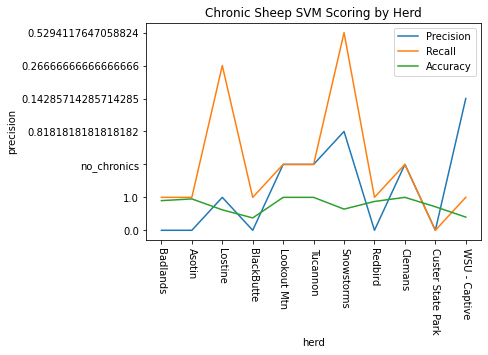

In [22]:
plt.xlabel("herd")
plt.ylabel("precision")
plt.title("Chronic Sheep SVM Scoring by Herd")

plt.plot(herd_list,herd_precision,label="Precision")
plt.plot(herd_list,herd_recall,label = "Recall")
plt.plot(herd_list,herd_accuracy,label = "Accuracy")
plt.legend(loc="upper left")
plt.xticks(rotation=-90)
plt.legend()
plt.show()

### Train On Over Sampled Data

In [71]:
type(X_test_scaled)

pandas.core.frame.DataFrame

In [78]:
clf1 = getClassifier(3,c_val = 1,gamma_val = 1)
#clf = getClassifier(0,c_val = 1,gamma_val = .1)

clf1.fit(X_train_scaled_oversample.iloc[:, : 25], y_train_oversample)


y_val_predict = clf1.predict(X_val_scaled.iloc[:, : 25])
y_test_predict = clf1.predict(X_test_scaled.iloc[:, : 25])

classification_report(y_test,y_test_predict, output_dict=True)

confusion_matrix(y_test,y_test_predict)

array([[ 7,  1],
       [ 4, 24]], dtype=int64)

In [79]:
# Export Actuals and Classifications
oversample_test_df = pd.DataFrame({
    "actual":y_test,
    "svm_prediction":y_test_predict,
    "herd":X_test_herds['herdx']
})

oversample_test_df.to_csv("../../data/datasets/svm_predictions.csv",index=False)